### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading The Data

In [2]:
data_frame = pd.read_csv("data.csv")
# X,y must be of type of ndArray not a pd.DataFrame
X = data_frame.iloc[:,1:14].values
y = data_frame.iloc[:,-1].values

### Splitting Data

In [4]:
from sklearn.model_selection import train_test_split

# Test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

### K-Nearest Negihbors

In [5]:
from sklearn.preprocessing import MinMaxScaler
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

#### picking the best KNN Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import KFold
n_splits = 10  

# Recall is more important than precision when the cost of acting is low
score = accuracy_score

max_score = 0
best_knn_classifier = 0
# finding the best K that gives the best score on the validation set
# the size of trainig is 690 so the max_k = 26
max_k = 26
for k in range(1, max_k, 2):

    kf = KFold(n_splits=n_splits)
    for train_index, test_index in kf.split(X_train):

        X_val_train, X_val_test = X_train_norm[train_index], X_train_norm[test_index]
        y_val_train, y_val_test = y_train[train_index], y_train[test_index]

        # create a new KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)

        # fitting to the y_val_training data
        knn_model.fit(X_val_train, y_val_train)

        # prediction
        y_val_predicted = knn_model.predict(X_val_test)

        # The score resulted from the prediction on y_val_test
        cv_score = score(y_true=y_val_test, y_pred=y_val_predicted)
        
        if cv_score > max_score:
            best_knn_classifier = knn_model
            max_score = cv_score

print(f"best-k = {best_knn_classifier.n_neighbors}")



best-k = 7


#### Testing

knn_model_f1-score = 0.5652173913043478
knn_model-precision = 0.6190476190476191
knn_model-Recall = 0.52


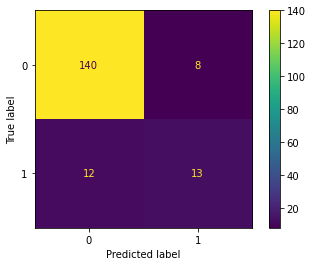

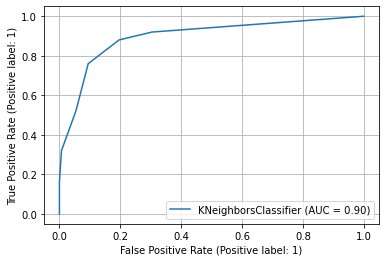

In [7]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# making predictions
y_pred_knn = best_knn_classifier.predict(X_test_norm)

# Confusion Matrix
plot_confusion_matrix(best_knn_classifier, X_test_norm, y_test)

# Precision, Recall, f1-score
print(f"knn_model_f1-score = {f1_score(y_test, y_pred_knn)}\nknn_model-precision = {precision_score(y_test,y_pred_knn)}\nknn_model-Recall = {recall_score(y_test,y_pred_knn)}")

# ROC curve
plot_roc_curve(best_knn_classifier, X_test_norm, y_test)
plt.grid()



### Logistic Regression


#### HyperParameters Tuning

In [8]:
# Identifing differenet hyperparameter to tune
param_grid = [
    {
        'penalty': ['l2', 'none'],
        'C':np.logspace(-2, 2, 10),
        'max_iter':[1000,1500,2000]
    }
]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_classifier = LogisticRegression()

# GridSearchCV finds the best combinatins of the hyperparameters in param_grid 
# the score to log_clf_cv which is the best classifier is Recall
log_clf_cv = GridSearchCV(log_classifier, param_grid, cv=10, scoring='recall')


In [ ]:
best_log_clf = log_clf_cv.fit(X_train,y_train)

In [11]:
best_log_clf.best_estimator_

LogisticRegression(C=0.01, max_iter=1000, penalty='none')

#### Testing

log_model_f1-score = 0.7999999999999999
log_model-precision = 0.9
log_model-Recall = 0.72


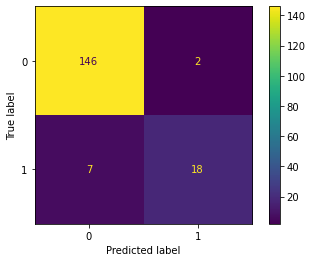

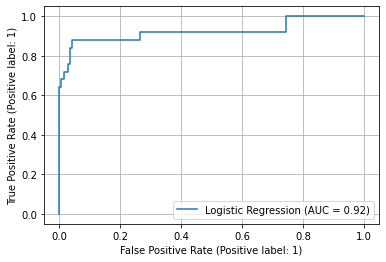

In [12]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, RocCurveDisplay,plot_roc_curve

# making predictions
y_predict_log = best_log_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_log_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"log_model_f1-score = {f1_score(y_test, y_predict_log)}\nlog_model-precision = {precision_score(y_test,y_predict_log)}\nlog_model-Recall = {recall_score(y_test,y_predict_log)}")

# ROC curve
plot_roc_curve(best_log_clf, X_test, y_test, name='Logistic Regression')
plt.grid()



### Naïve Bayes

log_model_f1-score = 0.41071428571428575
log_model-precision = 0.26436781609195403
log_model-Recall = 0.92


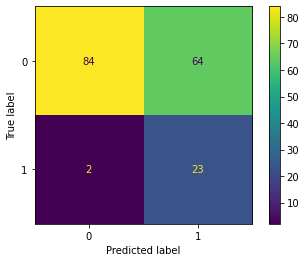

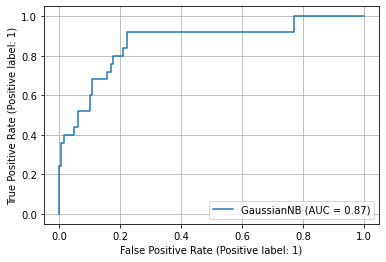

In [13]:
from sklearn.naive_bayes import GaussianNB
naive_clf = GaussianNB()

# training the model on training set
naive_clf.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred_naive = naive_clf.predict(X_test)

# Confusion Matrix 
plot_confusion_matrix(naive_clf, X_test, y_test)

# f1-score
print(f"log_model_f1-score = {f1_score(y_test, y_pred_naive)}\nlog_model-precision = {precision_score(y_test,y_pred_naive)}\nlog_model-Recall = {recall_score(y_test,y_pred_naive)}")

# ROC curve 
plot_roc_curve(naive_clf, X_test, y_test)
plt.grid()
# plotSoftClassify2D(learner,X,Y)

### Comparisons
 

#### ROC Curve and AUC

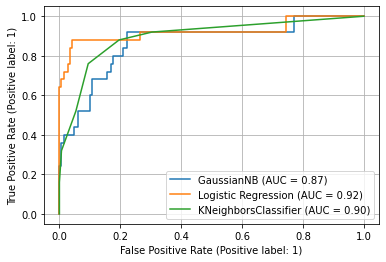

In [14]:
display = plot_roc_curve(naive_clf, X_test, y_test)
plot_roc_curve(best_log_clf, X_test, y_test, ax=display.ax_ ,name="Logistic Regression")
plot_roc_curve(best_knn_classifier,X_test_norm,y_test,ax=display.ax_)
plt.grid()
plt.show()


#### Recall

<BarContainer object of 3 artists>

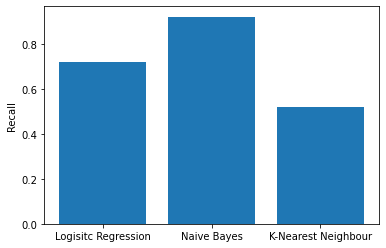

In [15]:
recall_df = {'Logisitc Regression': recall_score(y_test, y_predict_log), 'Naive Bayes': recall_score(
    y_test, y_pred_naive), 'K-Nearest Neighbour': recall_score(y_test, y_pred_knn)}

clfs = list(recall_df.keys())
recalls = list(recall_df.values())
plt.ylabel("Recall")
plt.bar(clfs,recalls)


#### Precision

<BarContainer object of 3 artists>

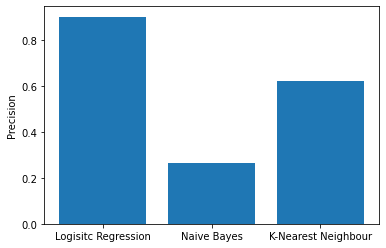

In [16]:
precision_df = {'Logisitc Regression': precision_score(y_test, y_predict_log), 'Naive Bayes': precision_score(
    y_test, y_pred_naive), 'K-Nearest Neighbour': precision_score(y_test, y_pred_knn)}

clfs = list(precision_df.keys())
precisions = list(precision_df.values())
plt.ylabel("Precision")
plt.bar(clfs,precisions)

#### F1-Score

<BarContainer object of 3 artists>

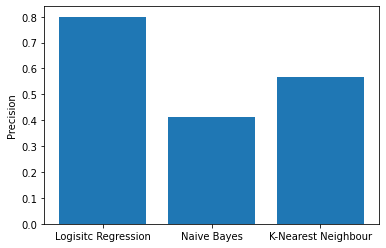

In [17]:
f1_score_df = {'Logisitc Regression': f1_score(y_test, y_predict_log), 'Naive Bayes': f1_score(
    y_test, y_pred_naive), 'K-Nearest Neighbour': f1_score(y_test, y_pred_knn)}

clfs = list(f1_score_df.keys())
f1_scores = list(f1_score_df.values())
plt.ylabel("Precision")
plt.bar(clfs,f1_scores)